In [1]:
%pip install firebase-admin

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate('key.json')  
firebase_admin.initialize_app(cred)

db = firestore.client()



# Total discount in the purchases registered in the database

In [3]:
# Referencia a la colección 'purchase'
users_ref = db.collection('purchase')

docs = users_ref.stream()

total_discount = 0

for doc in docs:
    total_discount += doc.to_dict().get('discount', 0)

print(f'Total discount of products: {total_discount}')

Total discount of products: 17022595


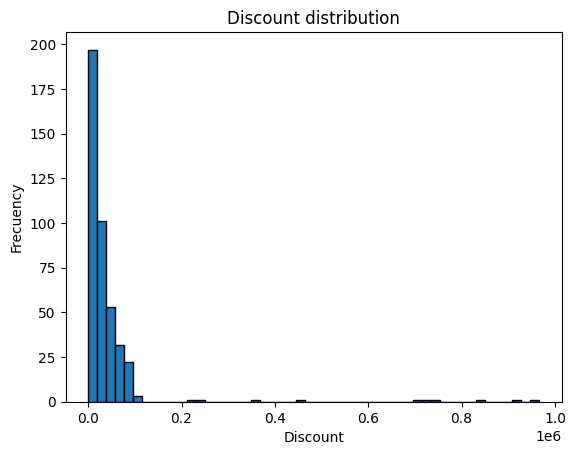

In [4]:
import matplotlib.pyplot as plt
users_ref = firestore.client().collection('purchase')

docs = users_ref.stream()
discounts = []

for doc in docs:
    discount = doc.to_dict().get('discount', 0)
    discounts.append(discount)

plt.hist(discounts, bins=50, edgecolor='black')

plt.xlabel('Discount')
plt.ylabel('Frecuency')
plt.title('Discount distribution')

# Mostrar el gráfico
plt.show()

In [5]:
users_ref = db.collection('purchase')

docs = users_ref.stream()

for doc in docs:
    print(f'{doc.id} => {doc.to_dict()}')

00d5832b-dae2-40c6-bf1c-fc26275abb32 => {'discount': 4800, 'purchaseDate': '30/12/2023', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
00e015ae-eea2-48ec-8430-b22512c6e657 => {'discount': 2300, 'purchaseDate': '27/01/2024', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
00fa6073-1917-4994-8937-eb391b56c49a => {'discount': 37900, 'purchaseDate': '05/01/2024', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
01a8W09UlcdCSV0kiBxZ => {'userId': '1234567890', 'purchaseDate': '01/01/2000', 'discount': 999}
01d80ee3-6feb-4029-b3bd-decac1202db3 => {'discount': 24600, 'purchaseDate': '24/01/2024', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
0212feaf-a480-415d-9539-0206bc74378f => {'discount': 1550, 'purchaseDate': '29/01/2024', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
02b8ee91-ab6e-45f6-a907-29ac6a8933f6 => {'discount': 11000, 'purchaseDate': '10/02/2024', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
02bd78fa-7fa1-4f0d-bdc3-5ba0a296b414 => {'discount': 40250, 'purchaseDate': '08/02/2024', 'userId': '4hGdoRo0AORn9Q4o3TP9'}
03c82eaf-2b1d-4858-97dc-2fd1c3dfcf69 =>

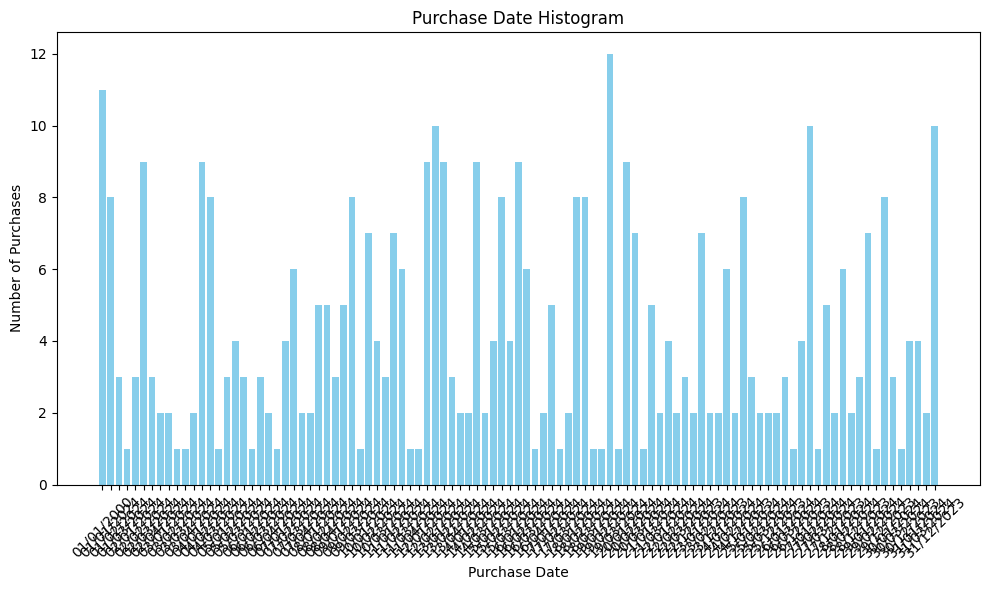

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Reference to the 'purchase' collection
purchase_ref = db.collection('purchase')

# Get all documents from the 'purchase' collection
docs = purchase_ref.stream()

purchase_dates = []

for doc in docs:
    purchase_data = doc.to_dict()
    purchase_dates.append(purchase_data['purchaseDate'])

purchase_date_counts = Counter(purchase_dates)

unique_dates = sorted(purchase_date_counts.keys())
counts = [purchase_date_counts[date] for date in unique_dates]

plt.figure(figsize=(10, 6))
plt.bar(unique_dates, counts, color='skyblue')
plt.title('Purchase Date Histogram')
plt.xlabel('Purchase Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Modeling using time series forecasting

c:\Users\JUAN BERNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


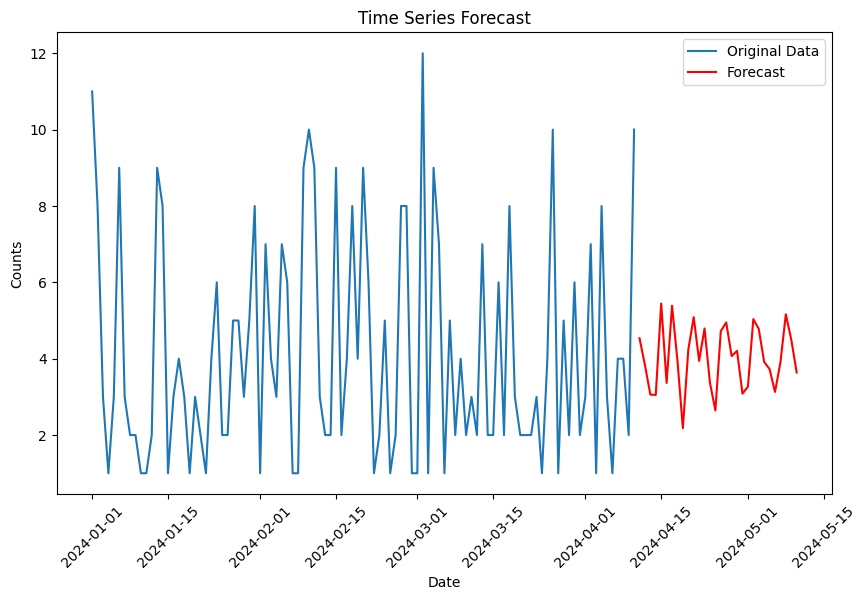

In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
dates = pd.date_range(start='2024-01-01', periods=len(counts), freq='D')
time_series = pd.Series(counts, index=dates)

dates = pd.date_range(start='2024-01-01', periods=len(counts), freq='D')
time_series = pd.Series(counts, index=dates)

# Fit an ARIMA model
model = ARIMA(time_series, order=(5, 1, 10))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Original Data')
forecast_dates = pd.date_range(start=dates[-1], periods=30+1, freq='D')[1:]
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Mean 9.548403321436046
Standard deviation 1.557939510641674


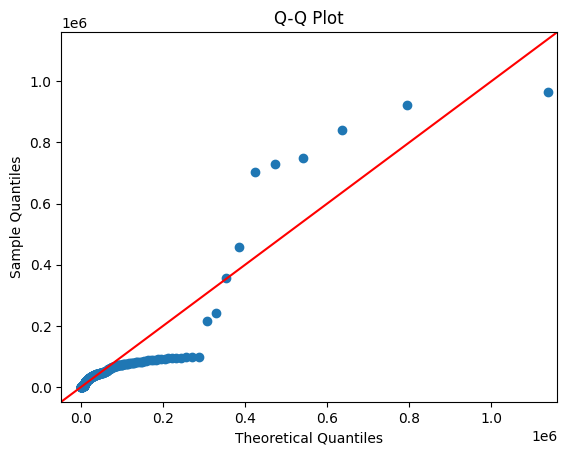

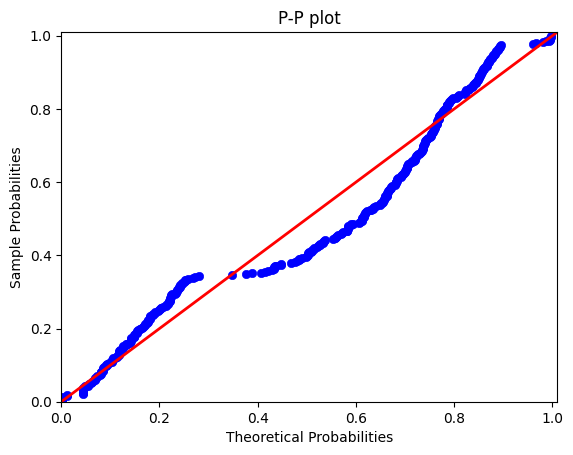

In [8]:
import numpy as np
import math
import numpy as np
import statistics as st
from scipy.stats import expon, norm, lognorm, gamma, weibull_min, beta, uniform, chi2, triang
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

discounts_array = np.array(discounts)

def PP_QQ_plot_lognormal(data,media="estimado",desvesta="estimado"):
    # Se verifica si se estiman parámetros o se utilizan los parámetros dados por el usuario
    if media=="estimado":
        mean = np.mean(np.log(data))
        print("Mean "+str(mean))
    else:
        mean = media
    
    if desvesta=="estimado":
        std_dev = np.std(np.log(data))
        print("Standard deviation "+str(std_dev))
    else:
        std_dev = desvesta  
    
    n = len(data)
    sm.qqplot(data, lognorm, distargs=(std_dev,), scale=np.exp(mean), line='45')
    # Se agrega un título a la gráfica
    plt.title("Q-Q Plot")
    # Se muestra la gráfica
    plt.show()
    
    fig, ax = plt.subplots()
    # Se calculan las probabilidades empíricas
    p = np.arange(1, n + 1) / n - 0.5 / n
    # Se calculan las probabilidades teóricas
    pp = np.sort(lognorm.cdf(data,s=std_dev,scale=np.exp(mean)))
    sns.scatterplot(x=pp, y=p, color='blue', edgecolor='blue', ax=ax)
    ax.set_title('P-P plot')
    ax.set_xlabel('Theoretical Probabilities')
    ax.set_ylabel('Sample Probabilities')
    ax.margins(x=0, y=0)
    # Se dibuja la línea roja de 45°
    plt.plot(np.linspace(0, 1.01), np.linspace(0, 1.01), 'r', lw=2)
    # Se muestra la gráfica
    plt.show()


PP_QQ_plot_lognormal(discounts_array,media="estimado",desvesta="estimado")

In [9]:
def chi_square_lognormal_goodness_of_fit(data,media="estimado",desvesta="estimado",r=2):
    """Performs a Chi-square goodness of fit test for a lognormal probability distribution with equiprobable classes.

    Arguments:
    data -- a list of data values
    media -- Data mean (lognormal asociada)
    desvesta -- Data Standard Deviation (lognormal asociada)
    r -- number of estimated parameters

    Returns:
    A tuple containing the test statistic and p-value.
    """
    # Se verifica si se estiman parámetros o se utilizan los parámetros dados por el usuario
    if media=="estimado":
        mean = np.mean(np.log(data))
        print("Parámetro estimado (lognormal asociada): Media = "+str(mean))
    else:
        mean = media
    
    if desvesta=="estimado":
        std_dev = np.std(np.log(data))
        print("Parámetro estimado (lognormal asociada): Desviación Estándar = "+str(std_dev))
    else:
        std_dev = desvesta  
    
    n = len(data)
    k = math.floor(n/5)

    intervals = np.linspace(0, 1, k+1)
    log_intervals = lognorm.ppf(intervals, std_dev, scale=np.exp(mean))

    # Calculate the expected frequencies for each interval
    expected_frequencies = np.diff(n * lognorm.cdf(log_intervals, std_dev, scale=np.exp(mean)))

    # Calculate the observed frequencies for each interval
    observed_frequencies, _ = np.histogram(data, log_intervals)

    # Calculate the test statistic
    chi_squared = sum((observed_frequencies[i] - expected_frequencies[i])**2 / expected_frequencies[i] for i in range(k))

    # Calculate the degrees of freedom
    degrees_of_freedom = k - r - 1

    # Calculate the p-value
    p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

    respuesta = "Chi-squared statistic: "+ str(chi_squared) + "\np-value: " + str(p_value)
    
    return print(respuesta)

chi_square_lognormal_goodness_of_fit(discounts_array)      

Parámetro estimado (lognormal asociada): Media = 9.548403321436046
Parámetro estimado (lognormal asociada): Desviación Estándar = 1.557939510641674
Chi-squared statistic: 249.57416267942554
p-value: 0.0


In [10]:
products_ref = firestore.client().collection('products')

products = products_ref.stream()

products_with_discount = []

for product in products:
    data = product.to_dict()
    price = float(data.get('price', 0))
    discount_price = float(data.get('discountPrice', 0))
    
    discount_percent = ((price - discount_price) / price) * 100
    
    products_with_discount.append({
        'name': data.get('name', ''),
        'discount_percent': discount_percent
    })

sorted_products = sorted(products_with_discount, key=lambda x: x['discount_percent'], reverse=True)

for product in sorted_products:
    print(f"Product: {product['name']}, Percentage Discount: {product['discount_percent']:.2f}%")


Product: Coca cola, Percentage Discount: 16.67%
Product: Agua con gas, Percentage Discount: 10.00%
Product: Agua , Percentage Discount: 10.00%
Product: Salsa de aguacate, Percentage Discount: 10.00%
Product: Agua de coco, Percentage Discount: 10.00%


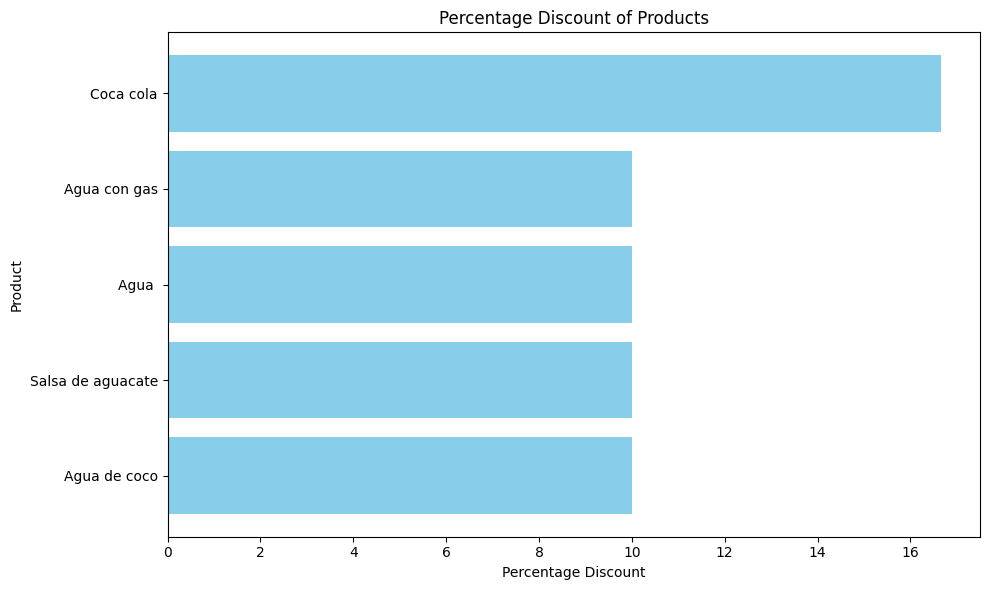

In [11]:
products_ref = firestore.client().collection('products')

# Get all products
products = products_ref.stream()

products_with_discount = []

for product in products:
    data = product.to_dict()
    price = float(data.get('price', 0))
    discount_price = float(data.get('discountPrice', 0))
    
    discount_percent = ((price - discount_price) / price) * 100
    
    products_with_discount.append({
        'name': data.get('name', ''),
        'discount_percent': discount_percent
    })

sorted_products = sorted(products_with_discount, key=lambda x: x['discount_percent'], reverse=True)


product_names = [product['name'] for product in sorted_products]
discount_percentages = [product['discount_percent'] for product in sorted_products]

plt.figure(figsize=(10, 6))
plt.barh(product_names, discount_percentages, color='skyblue')
plt.xlabel('Percentage Discount')
plt.ylabel('Product')
plt.title('Percentage Discount of Products')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

### Which are the spacial location of the supermarkets of the app and how far are they from other? 

In [12]:
supermarkets_ref = firestore.client().collection('supermarkets')

# Get all supermarkets
supermarkets = supermarkets_ref.stream()


In [13]:
%pip install folium
import folium
import random
map_center = [4.642962082961263, -74.0663064004288]
Locations={}
Demand={}
m = folium.Map(location=map_center, zoom_start=10)

for supermarket in supermarkets:
    data = supermarket.to_dict()

    Locations[data['name']] = [data['latitude'], data['longitude']]
    Demand[data['name']] = random.randint(40, 120)
print(Locations)




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


{'Justo y bueno Cra 57': [4.684803081835072, -74.06398073862319], 'Oxxo Eje ambiental': [4.601121084087453, -74.0686320622344], 'Carulla': [4.687612247257375, -74.03470183365027], 'Exito': [4.6884875, -74.0335687], 'Justo y bueno': [4.694996259041228, -74.05633454224211], 'Ara City U': [4.6030804704087664, -74.06716581434013]}


In [14]:
for name, coords in Locations.items():
    folium.Marker(
        location=coords,
        popup=name,
        icon=folium.Icon(icon="info-sign")
    ).add_to(m)

m

In [15]:
import math

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    

    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
  
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c  # in kilometers
    return distance

# Distances between supermarkets 

In [16]:
distances = []
names = list(Locations.keys())
for i in range(len(names)):
    for j in range(i + 1, len(names)):
        lat1, lon1 = Locations[names[i]]
        lat2, lon2 = Locations[names[j]]
        distance = haversine(lat1, lon1, lat2, lon2)
        distances.append((f"Distance between {names[i]} and {names[j]}", distance))

# Sort distances by the distance value
distances.sort(key=lambda x: x[1])

# Print sorted distances
for desc, dist in distances:
    print(f"{desc}: {dist:.2f} km")

Distance between Carulla and Exito: 0.16 km
Distance between Oxxo Eje ambiental and Ara City U: 0.27 km
Distance between Justo y bueno Cra 57 and Justo y bueno: 1.42 km
Distance between Carulla and Justo y bueno: 2.53 km
Distance between Exito and Justo y bueno: 2.62 km
Distance between Justo y bueno Cra 57 and Carulla: 3.26 km
Distance between Justo y bueno Cra 57 and Exito: 3.40 km
Distance between Justo y bueno Cra 57 and Ara City U: 9.09 km
Distance between Justo y bueno Cra 57 and Oxxo Eje ambiental: 9.32 km
Distance between Carulla and Ara City U: 10.06 km
Distance between Exito and Ara City U: 10.20 km
Distance between Justo y bueno and Ara City U: 10.29 km
Distance between Oxxo Eje ambiental and Carulla: 10.33 km
Distance between Oxxo Eje ambiental and Exito: 10.46 km
Distance between Oxxo Eje ambiental and Justo y bueno: 10.53 km


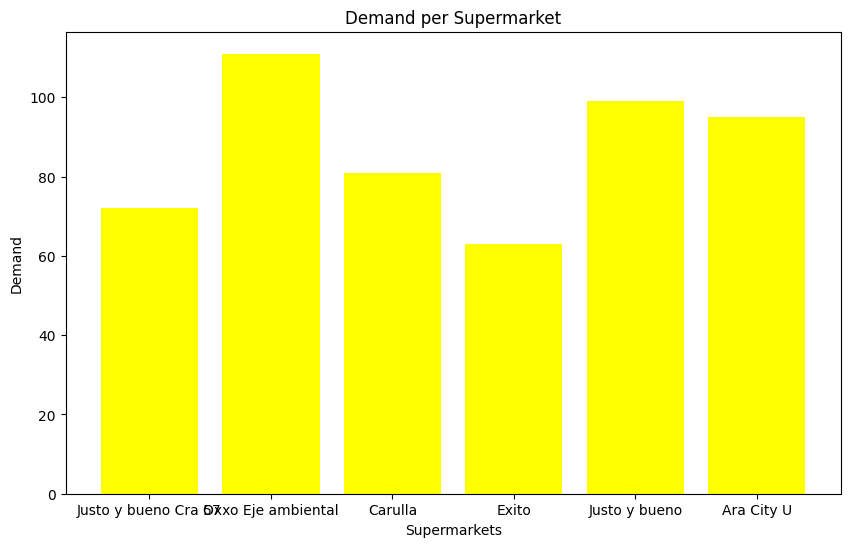

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(Demand.keys(), Demand.values(), color='yellow')
plt.xlabel('Supermarkets')
plt.ylabel('Demand')
plt.title('Demand per Supermarket')
plt.show()

#### What would be the best places to locate new supermarkets depending on the location and demand of others?

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

locations_df = pd.DataFrame(Locations).T
locations_df.columns = ['latitude', 'longitude']

num_new_supermarkets = 3

kmeans = KMeans(n_clusters=num_new_supermarkets)
kmeans.fit(locations_df)

centroids = kmeans.cluster_centers_
# Generamos el heatmap de demanda
heat_data = [[coords[0], coords[1], Demand[name]] for name, coords in Locations.items()]
HeatMap(heat_data).add_to(m)

for i, centroid in enumerate(centroids):
    folium.Marker(
        location=[centroid[0], centroid[1]],
        popup=f"Suggested Supermarket {i+1}",
        icon=folium.Icon(icon="info-sign", color="red")
    ).add_to(m)
m


ModuleNotFoundError: No module named 'sklearn'

## User registration

The following code shows amount of users registered per day, on the past two months

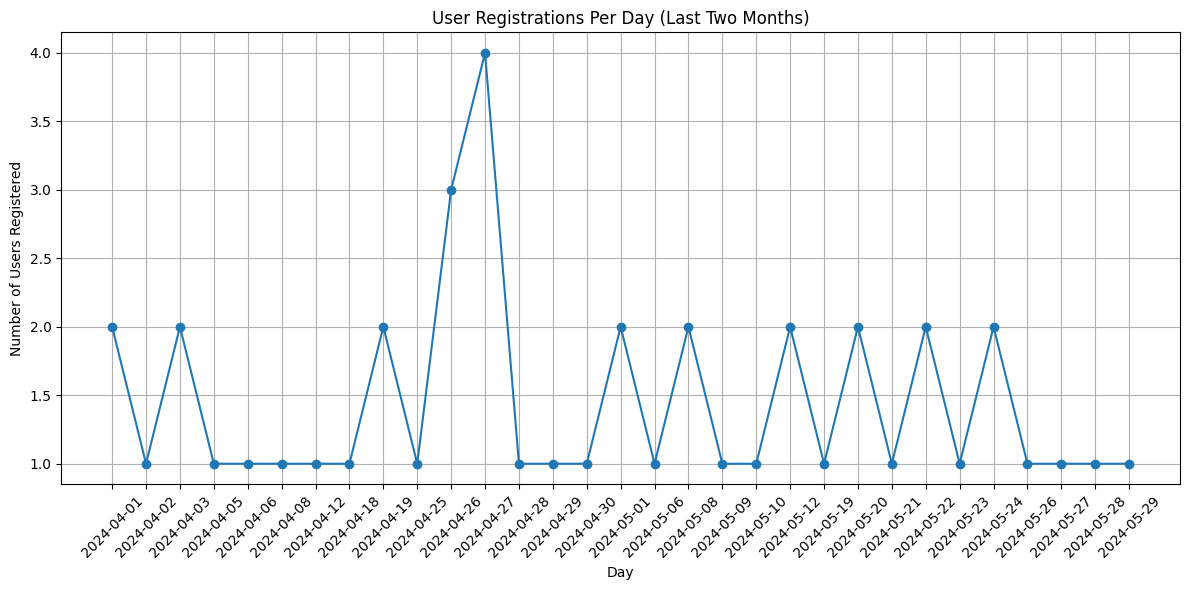

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime, timedelta

users_ref = db.collection('users')
user_docs = users_ref.stream()
registration_dates = []
for doc in user_docs:
    user_data = doc.to_dict()
    if 'registrationDate' in user_data:
        registration_date = user_data['registrationDate']
        # Convert Firestore timestamp to datetime
        registration_dates.append(registration_date)

date_format = "%Y-%m-%d"
registration_days = [date.strftime(date_format) for date in registration_dates]
day_counter = Counter(registration_days)

today = datetime.today()

two_months_ago = today - timedelta(days=60)

filtered_days = {day: count for day, count in day_counter.items() if datetime.strptime(day, date_format) >= two_months_ago}

sorted_days = sorted(filtered_days.keys())
counts = [filtered_days[day] for day in sorted_days]

plt.figure(figsize=(12, 6))
plt.plot(sorted_days, counts, marker='o')
plt.xlabel('Day')
plt.ylabel('Number of Users Registered')
plt.title('User Registrations Per Day (Last Two Months)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Price distribution for different products

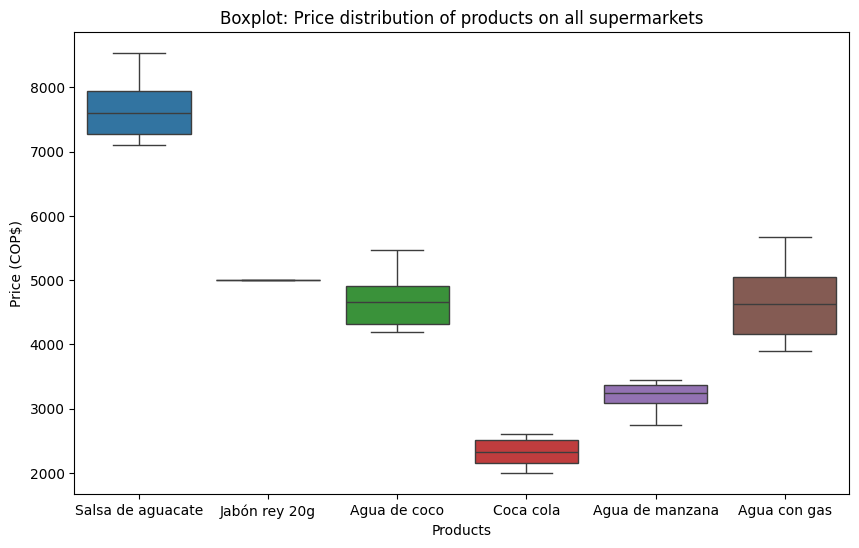

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

prods2 = {}
sups = db.collection("supermarkets").stream()

for sup in sups:
    prods = sup.reference.collection("products").stream()
    for prod in prods:
        prod_dict = prod.to_dict()
        if prod_dict["Name"] in prods2:
            prods2[prod_dict["Name"]].append(prod_dict["Price"])
        else:
            prods2[prod_dict["Name"]] = [prod_dict["Price"]]

prods_df = pd.DataFrame(prods2)

plt.figure(figsize=(10, 6))
sns.boxplot(data=prods_df)

# Add title and labels
plt.title('Boxplot: Price distribution of products on all supermarkets')
plt.xlabel('Products')
plt.ylabel('Price (COP$)')

# Show the plot
plt.show()


## Price insights

 - What is the average price of products acrross supermarkets?
 - What is the standard deviation of that price?
 - What is the maximum price?
 - What is the minimun price?
 - How many supermarkets offer a product?

In [ ]:
from tabulate import tabulate
import numpy as np

price_avgs_tab_data = []
for prod in prods2:
    avg = sum(prods2[prod]) / len(prods2[prod])
    prices = prods2[prod]
    price_avgs_tab_data.append([prod, avg, np.std(prices), max(prices), min(prices), len(prices)])

print(tabulate(price_avgs_tab_data, headers=["Product", "Average price ($COP)", "Std. Dev. ($COP)", "Max", "Min", "# of sup/s that offer the product"]))

Product              Average price ($COP)    Std. Dev. ($COP)      Max      Min    # of sup/s that offer the product
-----------------  ----------------------  ------------------  -------  -------  -----------------------------------
Salsa de aguacate                 7679.35             491.837  8532.91  7100.52                                    6
Jabón rey 20g                     5000                  0      5000     5000                                       6
Agua de coco                      4692.78             438.07   5464.67  4195.29                                    6
Coca cola                         2320.52             224.669  2607.44  1995.41                                    6
Agua de manzana                   3187.56             236.989  3448.99  2749.15                                    6
Agua con gas                      4668.82             610.16   5671.24  3894.24                                    6


In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate('key.json')  
firebase_admin.initialize_app(cred)

db = firestore.client()



In [25]:
%pip install scikit-learn



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 11.0/11.0 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 9.1 MB/s eta 0:00:00


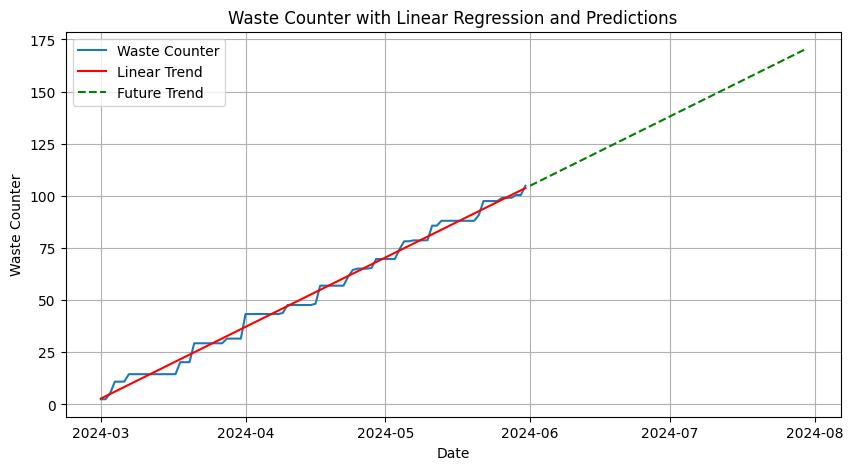

In [33]:
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

docs = db.collection('Waste Counter').stream()

data = []
for doc in docs:
    doc_id = doc.id
    doc_data = doc.to_dict()
    doc_data['date'] = datetime.strptime(doc_id, '%Y-%m-%d')
    data.append(doc_data)

df = pd.DataFrame(data)
df = df.sort_values(by='date') 
df['waste_counter'] = np.maximum.accumulate(df['waste_counter'])

X = np.array(range(len(df))).reshape(-1, 1)
y = df['waste_counter'].values
reg = LinearRegression().fit(X, y)
df['trend'] = reg.predict(X)

end_date = df['date'].max()
future_dates = pd.date_range(end_date + timedelta(days=1), end_date + timedelta(days=60), freq='D')
future_X = np.array(range(len(df), len(df) + len(future_dates))).reshape(-1, 1)
future_trend = reg.predict(future_X)

future_trend = np.maximum.accumulate(future_trend)

future_data = {'date': future_dates, 'trend': future_trend}
future_df = pd.DataFrame(future_data)

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['waste_counter'], label='Waste Counter')
plt.plot(df['date'], df['trend'], label='Linear Trend', color='red')
plt.plot(future_df['date'], future_df['trend'], label='Future Trend', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Waste Counter')
plt.title('Waste Counter with Linear Regression and Predictions')
plt.legend()
plt.grid(True)
plt.show()